En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

 - Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

 - Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe


In [3]:
df = pd.read_csv("Datos/possum_norm.csv", index_col = 0)
df.head(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_norm,age_log,age_raiz,age_Sklearn
case,,,,,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.522837,2.079442,2.828427,0.625
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0.272837,1.791759,2.449490,0.625


In [4]:
media = df["belly"].mean()
desviacion = df["belly"].std() 

In [5]:
df["belly_esta"] = (df["belly"] - media) / desviacion

In [6]:
df.head(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_norm,age_log,age_raiz,age_Sklearn,belly_esta
case,,,,,,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.522837,2.079442,2.828427,0.625,1.235889
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0.272837,1.791759,2.449490,0.625,0.149699


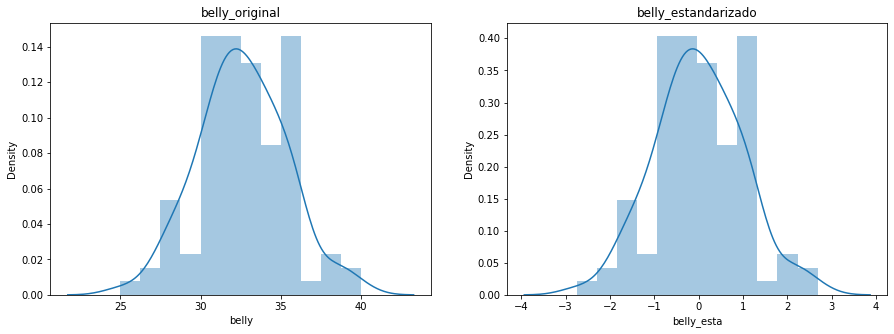

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('belly_original')
axes[1].set_title('belly_estandarizado')

sns.distplot(df["belly"] ,ax = axes[0])
sns.distplot(df["belly_esta"], ax = axes[1]);

In [8]:
print(f'La media de la columna belly_esta es:  {np.round(df["belly_esta"].mean(),1)}')
print(f'La desviación estándar de la columna belly_esta es: {np.round(df["belly_esta"].std(),1)}')

La media de la columna belly_esta es:  0.0
La desviación estándar de la columna belly_esta es: 1.0


In [9]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_norm,age_log,age_raiz,age_Sklearn,belly_esta
case,,,,,,,,,,,,,,,,
1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.522837,2.079442,2.828427,0.625,1.235889
2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0.272837,1.791759,2.449490,0.625,0.149699
3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0.272837,1.791759,2.449490,0.625,0.511762
4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0.272837,1.791759,2.449490,0.125,0.511762
5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,-0.227163,0.693147,1.414214,0.000,0.149699


In [10]:

numericas.drop(["site", 'age', 'skullw', "totlngth", "taill", "footlgth", "earconch", 
                "eye","age_norm", "age_log","age_raiz","age_Sklearn", "belly_esta" ], axis = 1, inplace = True)

numericas.head(2)

,hdlngth,chest,belly
case,,,
1,94.1,28.0,36.0
2,92.5,28.5,33.0


In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(numericas)

StandardScaler()

In [13]:
X_escaladas = scaler.transform(numericas)

In [14]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(5)

,hdlngth,chest,belly
0,0.420996,0.491222,1.241874
1,-0.028932,0.736833,0.150424
2,0.392875,1.473667,0.514241
3,0.167912,0.491222,0.514241
4,-0.310136,0.736833,0.150424


In [15]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna hdlngth es:  -2.7034998171761626e-15
La desviación estándar de la columna hdlngth es: 1.0048426433348048
-------------------------------------------------------------
La media de la columna chest es:  1.0675221390626505e-16
La desviación estándar de la columna chest es: 1.0048426433348046
-------------------------------------------------------------
La media de la columna belly es:  5.882046986235205e-16
La desviación estándar de la columna belly es: 1.004842643334805
-------------------------------------------------------------


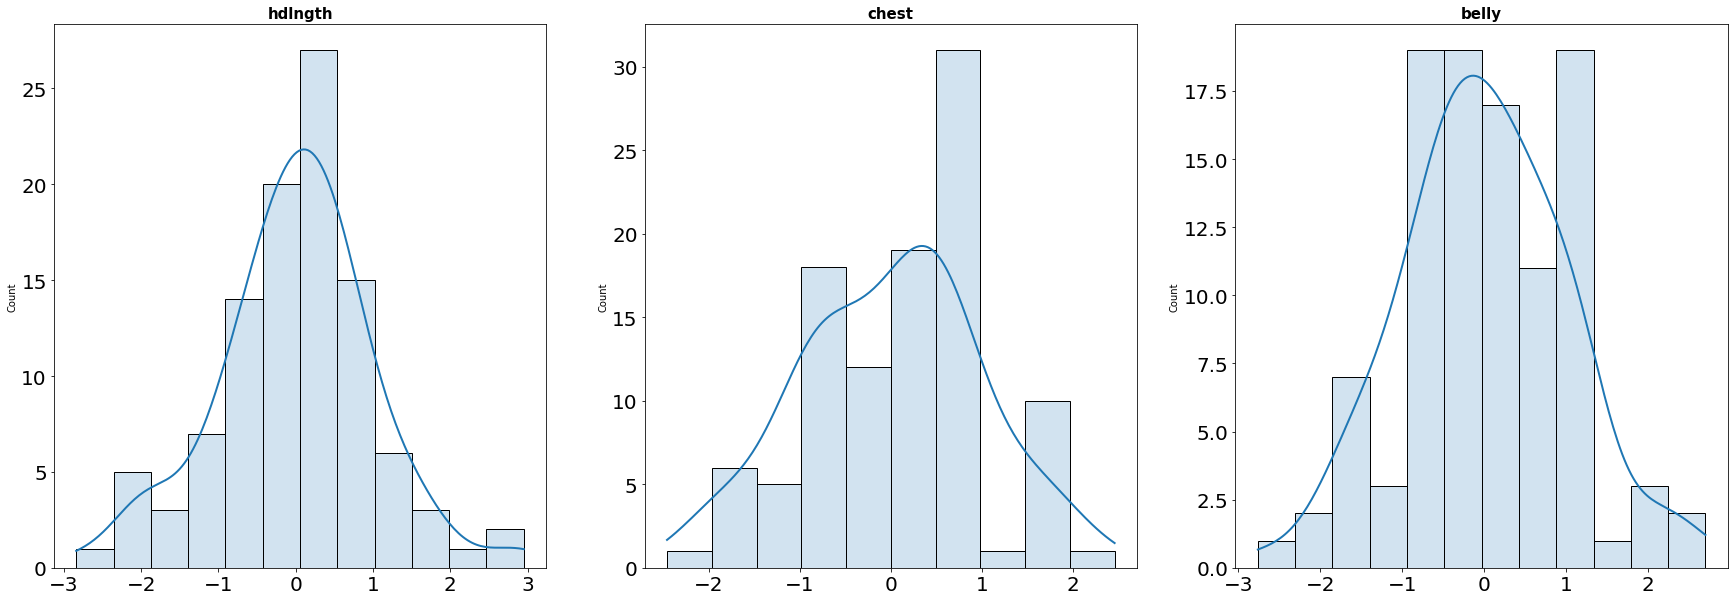

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


In [18]:
robust = RobustScaler()

In [19]:
robust.fit(numericas)

RobustScaler()

In [20]:
X_robust = robust.transform(numericas)

In [21]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,hdlngth,chest,belly
0,0.320988,0.4,1.12
1,-0.074074,0.6,0.16


In [22]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna hdlngth es:  -0.04867046533713141
La desviación estándar de la columna hdlngth es: 0.8823085150813345
-------------------------------------------------------------
La media de la columna chest es:  4.376840770156867e-17
La desviación estándar de la columna chest es: 0.8182386956791985
-------------------------------------------------------------
La media de la columna belly es:  0.02769230769230772
La desviación estándar de la columna belly es: 0.8838235895335573
-------------------------------------------------------------


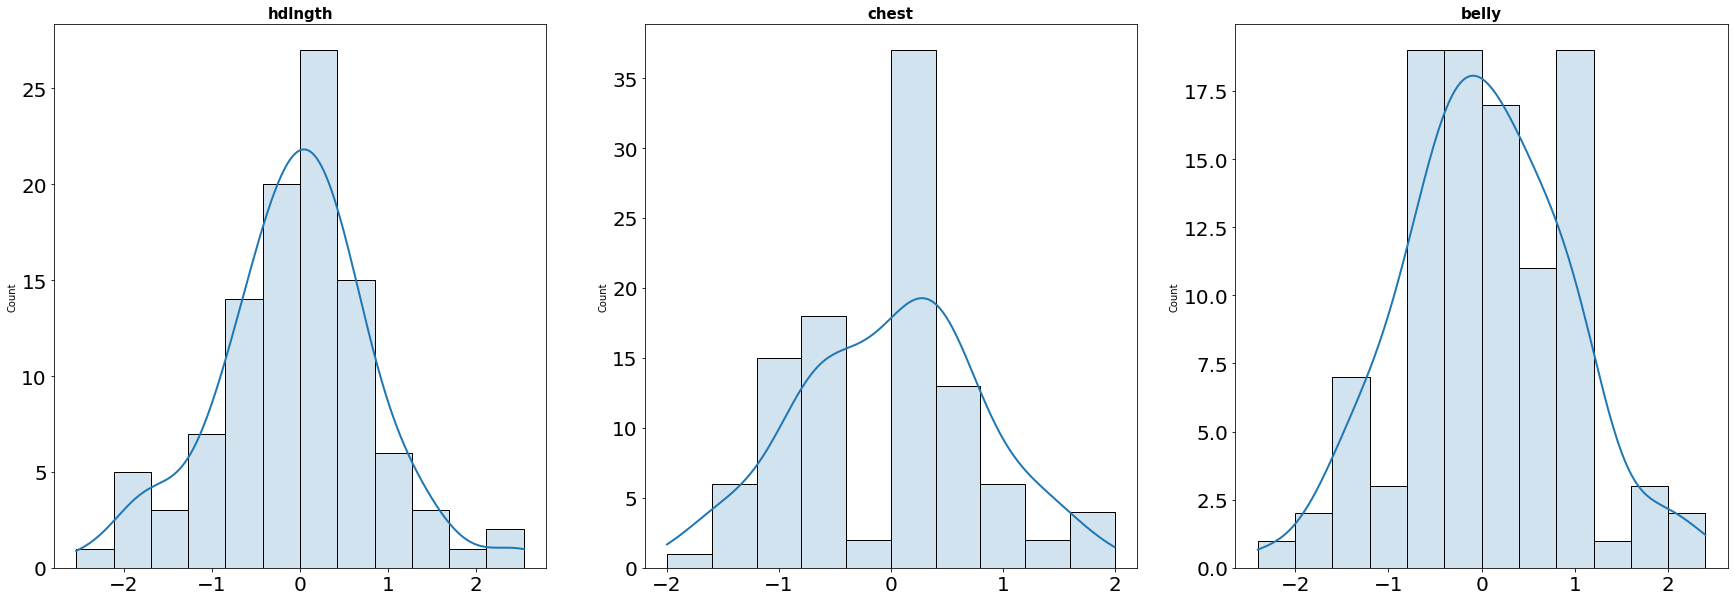

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


In [24]:
df[numericas_estandar.columns] = numericas_estandar
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_norm,age_log,age_raiz,age_Sklearn,belly_esta
case,,,,,,,,,,,,,,,,,,
1,1,Vic,m,8.0,-0.028932,60.4,89.0,36.0,74.5,54.5,15.2,0.736833,0.150424,0.522837,2.079442,2.828427,0.625,1.235889
2,1,Vic,f,6.0,0.392875,57.6,91.5,36.5,72.5,51.2,16.0,1.473667,0.514241,0.272837,1.791759,2.449490,0.625,0.149699
3,1,Vic,f,6.0,0.167912,60.0,95.5,39.0,75.4,51.9,15.5,0.491222,0.514241,0.272837,1.791759,2.449490,0.625,0.511762
4,1,Vic,f,6.0,-0.310136,57.1,92.0,38.0,76.1,52.2,15.2,0.736833,0.150424,0.272837,1.791759,2.449490,0.125,0.511762
5,1,Vic,f,2.0,0.139791,56.3,85.5,36.0,71.0,53.2,15.1,1.473667,-0.213392,-0.227163,0.693147,1.414214,0.000,0.149699


In [25]:
df.to_csv("Datos/possum_esta.csv")